<a href="https://colab.research.google.com/github/RafiAwanda123/Komputasi-ML-python/blob/Tugas-Komputasi/TugasProjectFiskom.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Transformasi Fourier**

###Masukin libraries libraries yang di butuhkan

In [ ]:
import numpy as np
import scipy as sp
from scipy.integrate import quad
import matplotlib.pyplot as plt 
import sympy as sy
from sympy.integrals.transforms import fourier_transform
from skimage import color

###Transformasi Fourier (waktu dan frekuensi yang terus menerus)

Disini kita pake fungsi yang sudah ada dimana nilainya dari -∞ sampai ∞

$\int_{-∞}^\infty \hat{x}(t)e^{-2\pi ift} dt$



---



In [ ]:
t, f = sy.symbols('t, f', real=True)
k = sy.symbols('k', real=True, positive=True)
x = sy.exp(-k * t**2) * k * t
x

k*t*exp(-k*t**2)

In [ ]:
x_TF = fourier_transform(x,t,f)
x_TF

-I*pi**(3/2)*f*exp(-pi**2*f**2/k)/sqrt(k)



---



Fungsi berhenti di sini karena sympy itu tidak bisa mengevalusai integral secara analitik jadi gunakan scipy untuk kasus ini. Tentukan fungsi yang ingin kita ambil dari transformasi fourier dan fungsi untuk menghitung transformasi fourier



-----



In [ ]:
def x(t, k):
  return np.exp(-k * t**2) * np.sin(k*t) * t**4

def buat_x_TF(x,f,k):
  x_TF_integral_real = lambda t: np.real(x(t, k)*np.exp(-2*np.pi*1j*f*t)) #integral real yang sesuai dengan fungsi pertama 
  x_TF_integral_imaj = lambda t: np.imag(x(t, k)*np.exp(-2*np.pi*1j*f*t)) #integral imaginer yang sesuasi dengan fungsi pertama 
  x_TF_real = quad(x_TF_integral_real, -np.inf, np.inf)[0]
  x_TF_imaj = quad(x_TF_integral_imaj, -np.inf, np.inf)[0]
  return x_TF_real + 1j*x_TF_imaj

isi nilai frekuensi dan nilai transformasi fourier

In [ ]:
f = np.linspace(-8,8,150)
x_TF = np.vectorize(buat_x_TF)(x,f,k=2)

#**Plot**

Text(0.5, 1.0, 'Transformasi Fourier')

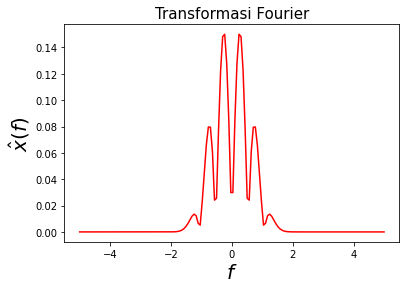

In [ ]:
plt.plot(f, np.abs(x_TF), color = 'red')
plt.ylabel('$\hat{x}(f)$', fontsize = 20)
plt.xlabel('$f$', fontsize = 20 )
plt.title('Transformasi Fourier', fontsize = 15)